In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [5]:
train_df=train_df.dropna()

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_df["sub-class"] = label_encoder.fit_transform(train_df["sub-class"])
train_df["departure city"] = label_encoder.fit_transform(train_df["departure city"])
train_df["location"] = label_encoder.fit_transform(train_df["location"])
train_df["class"] = label_encoder.fit_transform(train_df["class"])
train_df["segment"] = label_encoder.fit_transform(train_df["segment"])
train_df["delivery type"] = label_encoder.fit_transform(train_df["delivery type"])
#train_df["delivery date"] = label_encoder.fit_transform(train_df["delivery date"])
train_df["departure state"] = label_encoder.fit_transform(train_df["departure state"])
#train_df["placement date"] = label_encoder.fit_transform(train_df["placement date"])

In [7]:
label_encoder = LabelEncoder()
test_df["sub-class"] = label_encoder.fit_transform(test_df["sub-class"])
test_df["departure city"] = label_encoder.fit_transform(test_df["departure city"])
test_df["location"] = label_encoder.fit_transform(test_df["location"])
test_df["class"] = label_encoder.fit_transform(test_df["class"])
test_df["segment"] = label_encoder.fit_transform(test_df["segment"])
test_df["delivery type"] = label_encoder.fit_transform(test_df["delivery type"])
#test_df["delivery date"] = label_encoder.fit_transform(test_df["delivery date"])
test_df["departure state"] = label_encoder.fit_transform(test_df["departure state"])
#test_df["placement date"] = label_encoder.fit_transform(test_df["placement date"])

In [8]:
train_df = train_df.drop(['id', 'RID','address code'], axis=1)
test_df = test_df.drop(['RID', 'id','address code'], axis=1)
train_df['final']=train_df['price']*(1-train_df['discount'])
test_df['final']=test_df['price']*(1-test_df['discount'])

In [9]:
train_df['delivery date']=pd.to_datetime(train_df['delivery date'])
test_df['delivery date']=pd.to_datetime(test_df['delivery date'])
train_df['placement date']=pd.to_datetime(train_df['placement date'])
test_df['placement date']=pd.to_datetime(test_df['placement date'])

In [10]:
train_df['delivery date']=train_df['delivery date'].dt.month
test_df['delivery date']=test_df['delivery date'].dt.month
train_df['placement date']=train_df['placement date'].dt.month
test_df['placement date']=test_df['placement date'].dt.month

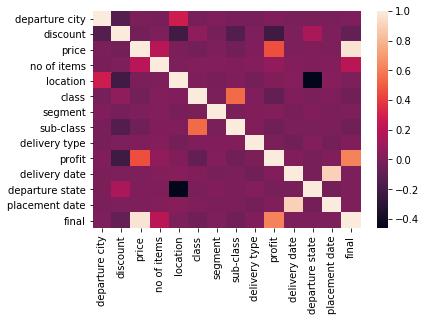

In [11]:
import seaborn as sns
corr = train_df.corr()
corr

sns.heatmap(corr)

In [13]:
dftry=train_df[(train_df['sub-class']==10)&  (train_df['discount']==0.2)]#& (dff['location']=='South')]# & (dff['profit/price']<=.36)]# & (dff['delivery type']=='First Class')]
dftry

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,profit,delivery date,departure state,placement date,final
0,186,0.2,16.448,2,0,1,0,10,3,5.5512,1,40,1,13.1584
38,396,0.2,56.064,4,3,1,0,10,0,19.6224,1,1,1,44.8512
69,291,0.2,37.408,7,1,1,0,10,3,13.0928,1,32,1,29.9264
83,186,0.2,16.176,3,0,1,0,10,2,6.0660,2,40,2,12.9408
89,255,0.2,32.896,4,3,1,0,10,3,11.1024,3,34,2,26.3168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6447,261,0.2,37.408,7,2,1,2,10,2,13.0928,1,8,12,29.9264
6458,330,0.2,7.968,2,1,1,2,10,3,2.6892,12,35,12,6.3744
6519,186,0.2,30.816,9,0,1,1,10,2,9.6300,12,40,12,24.6528
6661,139,0.2,9.392,2,0,1,1,10,3,3.2872,12,40,12,7.5136


In [153]:
train_df.head()

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,profit,delivery date,departure state,placement date,final
0,186,0.2,16.448,2,0,1,0,10,3,5.5512,1,40,1,13.1584
1,456,0.0,29.700,5,0,1,0,5,3,13.3650,1,20,1,29.7000
2,456,0.0,14.730,3,0,2,0,11,3,4.8609,1,20,1,14.7300
3,456,0.0,43.920,3,0,1,0,14,3,12.7368,1,20,1,43.9200
4,456,0.0,66.580,2,0,1,0,7,3,15.9792,1,20,1,66.5800


In [14]:
xx=dftry['price']
yy=dftry['profit']


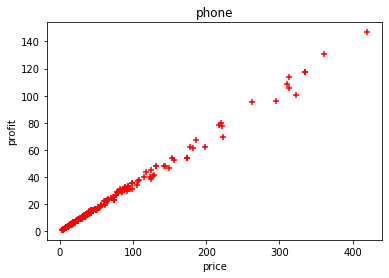

In [15]:
#plt.figure(figsize=(40,20))
plt.title('phone')
plt.xlabel("price")
plt.ylabel("profit")

plt.scatter(xx,yy,marker='+',color='red')

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

In [36]:
sclist=[]
random_forest0 = RandomForestRegressor(n_estimators=200)
random_forest1 = RandomForestRegressor(n_estimators=200)
random_forest2 = RandomForestRegressor(n_estimators=200)
random_forest3 = RandomForestRegressor(n_estimators=200)
random_forest4 = RandomForestRegressor(n_estimators=200)
random_forest5 = RandomForestRegressor(n_estimators=200)
random_forest6 = RandomForestRegressor(n_estimators=200)
random_forest7 = RandomForestRegressor(n_estimators=200)
random_forest8 = RandomForestRegressor(n_estimators=200)
random_forest9 = RandomForestRegressor(n_estimators=200)
random_forest10 = RandomForestRegressor(n_estimators=200)
random_forest11 = RandomForestRegressor(n_estimators=200)
random_forest12 = RandomForestRegressor(n_estimators=200)
random_forest13 = RandomForestRegressor(n_estimators=200)
random_forest14 = RandomForestRegressor(n_estimators=200)
random_forest15 = RandomForestRegressor(n_estimators=200)
random_forest16 = RandomForestRegressor(n_estimators=200)
mlist=[random_forest0,random_forest1,random_forest2,random_forest3,random_forest4,random_forest5,random_forest6,random_forest7,
       random_forest8,random_forest9,random_forest10,random_forest11,random_forest12,random_forest13,random_forest14,random_forest15,
      random_forest16]

In [737]:
def rfr(x_train,y_train,x_test,y_test,i):
    #random_forest = RandomForestRegressor(n_estimators=200)
    mlist[i].fit(x_train, y_train)
    #Y_pred = random_forest.predict(X_test)
    mlist[i].score(x_test, y_test)
    acc_random_forest = round(mlist[i].score(x_test, y_test) * 100, 2)
    sclist.append([i,len(y_train),len(y_test),acc_random_forest])

In [738]:
for i in range(17):
    trlist=train_df[train_df['sub-class']==i]
    x=trlist.drop(['profit','sub-class'],axis=1)
    y=trlist['profit']
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
    #X_train=X_train.drop(['profit','class','sub-class','delivery date','address code'],axis='columns')
    #Y_train=train_df[train_df['sub-class']==i]['profit']
    #X_test=test_df[test_df['sub-class']==i]
    rfr(x_train,y_train,x_test,y_test,i)
print(sclist)

[[0, 272, 31, 96.3], [1, 117, 14, 0.61], [2, 451, 51, 79.68], [3, 537, 60, 87.4], [4, 42, 5, 78.49], [5, 922, 103, 49.31], [6, 194, 22, 74.64], [7, 503, 56, 50.2], [8, 139, 16, 44.72], [9, 136, 16, -4.81], [10, 820, 92, 96.91], [11, 576, 65, 77.61], [12, 74, 9, 23.87], [13, 225, 25, 99.39], [14, 461, 52, 98.29], [15, 385, 43, 59.29], [16, 166, 19, 92.14]]


In [304]:
rf00=RandomForestRegressor(n_estimators=200)
gbr00 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.099, max_depth=5, random_state=232, loss='ls')
lr00=LinearRegression()
rf01=RandomForestRegressor(n_estimators=200)
gbr01 = GradientBoostingRegressor(n_estimators=4000, learning_rate=0.1, max_depth=5, random_state=232, loss='ls')
lr01=LinearRegression()
rf02=RandomForestRegressor(n_estimators=200)
gbr02 = GradientBoostingRegressor(n_estimators=4000, learning_rate=0.10, max_depth=5, random_state=232, loss='ls')
lr02=LinearRegression()

In [155]:
df00=train_df[train_df['class']==0]
df01=train_df[train_df['class']==1]
df02=train_df[train_df['class']==2]

In [325]:
x=df00.drop(['class','profit','departure city','price','departure state'],axis=1)
y=df00['profit']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1, random_state=14)
gbr00.fit(x_train, y_train)
score = round(gbr00.score(x_test, y_test) * 100, 2)
score

96.79

In [301]:
x=df01.drop(['class','profit','location','no of items','departure state'],axis=1)
y=df01['profit']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1, random_state=14)
gbr01.fit(x_train, y_train)
score = round(gbr01.score(x_test, y_test) * 100, 2)
score

95.92

In [296]:
x=df02.drop(['class','profit','final','segment','delivery date'],axis=1)
y=df02['profit']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1, random_state=5)
gbr02.fit(x_train, y_train)
score = round(gbr02.score(x_test, y_test) * 100, 2)
score

90.89

In [242]:
glistnew=[gbr00,gbr01,gbr02]

In [247]:
test_df=test_df.dropna()

In [251]:
test_df.head(10)

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,delivery date,departure state,placement date,final
0,291,0.0,24.200,5,3,1,0,14,3,1,3,1,24.2000
1,291,0.2,359.976,3,3,0,0,3,3,1,3,1,287.9808
2,335,0.0,3.520,2,1,1,0,14,3,1,5,1,3.5200
3,45,0.2,11.520,5,0,1,0,13,0,1,11,1,9.2160
4,300,0.0,242.940,3,3,1,2,7,3,1,44,1,242.9400
5,300,0.0,179.970,3,3,0,2,2,3,1,44,1,179.9700
6,300,0.2,27.936,4,3,1,2,5,3,1,44,1,22.3488
7,300,0.0,84.980,1,3,2,2,9,3,1,44,1,84.9800
8,300,0.2,18.720,5,3,1,2,5,3,1,44,1,14.9760
9,40,0.2,348.208,7,2,1,2,7,3,1,30,1,278.5664


In [255]:
Y_pred=[]

for i in range(len(test_df)):
    
    p=int(test_df.loc[i]['class'])
    print(p)
    kk=testingnew(p)
    item=kk.loc[i].drop(['class'])
    yp=glistnew[p].predict([item])
    Y_pred.append(yp)

1
0
1
1
1
0
1
2
1
1
1
1
1
0
1
1
1
0
1
1
1
2
1
2
1
2
2
2
1
0
1
1
1
1
1
1
1
1
2
0
1
0
0
0
0
2
1
0
1
1
1
1
1
1
1
0
2
1
2
1
0
1
1
1
1
1
1
1
1
1
1
2
1
0
1
1
0
1
1
1
0
1
1
1
1
2
2
1
1
2
2
1
1
1
1
2
1
1
2
1
1
1
1
1
0
0
1
2
1
2
1
1
0
2
1
0
1
2
1
1
0
1
1
2
1
0
1
1
0
0
1
1
1
1
0
1
1
1
0
1
1
2
2
0
1
0
1
2
1
0
1
2
0
1
2
1
0
0
1
2
2
0
1
1
2
1
1
1
0
2
1
1
2
0
1
0
2
1
0
1
1
0
1
1
0
2
2
1
2
1
1
2
2
2
0
1
1
1
1
1
2
1
1
0
1
1
0
1
2
1
1
2
1
1
0
1
1
1
1
1
1
1
0
1
1
1
1
1
2
0
1
2
1
0
0
1
1
2
1
2
2
1
2
1
1
1
1
1
1
2
1
2
1
1
1
1
1
0
1
0
1
0
2
2
1
0
1
1
1
1
1
1
2
2
1
1
0
0
1
1
1
1
1
0
0
0
1
2
2
1
1
1
2
0
0
1
1
1
1
1
1
0
0
2
2
0
1
1
1
2
1
1
1
1
1
0
1
2
2
0
1
0
2
0
1
1
0
1
1
0
2
2
1
0
2
1
1
1
2
1
1
2
0
1
0
0
2
1
1
2
1
1
1
1
1
1
2
1
2
2
1
1
0
1
0
1
1
1
2
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
0
0
1
1
0
2
0
2
1
1
1
1
0
0
1
1
2
1
1
1
1
1
1
1
0
0
2
2
1
1
1
2
1
1
1
1
2
0
1
1
0
0
1
1
0
0
0
2
1
0
1
1
0
1
1
1
1
0
1
0
0
1
1
1
1
1
1
1
1
1
0
1
2
1
1
2
1
0
2
0
1
1
1
0
0
1
1
2
1
1
0
1
0
0
1
0
1
1
1
0
2
0
1
2
2
1
1
2
1
0
1
1
2
1
2
2


In [254]:
def testingnew(p):
    if p==0:
        kk=test_df.drop(['departure city','price','segment','departure state','delivery date'],axis=1)
        return kk
    elif p==1:
        kk=test_df.drop(['location','no of items','departure state'],axis=1)
        return kk
    elif p==2:
        kk=test_df.drop(['final','segment','delivery date'],axis=1)
        return kk
        

In [40]:
battery=train_df[train_df['sub-class']==0]
battery['final']=battery['price']*(1-battery['discount'])
battery['profit'].describe()

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


count     303.000000
mean       34.427340
std       146.850213
min     -1181.282400
25%         4.627800
50%        16.588800
75%        54.520200
max       751.760100
Name: profit, dtype: float64

In [58]:
plist=[]
x=battery.drop(['sub-class','profit','no of items','delivery type','location','placement date','departure state'],axis=1)
y=battery['profit']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1, random_state=11)
gbr0.fit(x_train, y_train)
score = round(gbr0.score(x_test, y_test) * 100, 2)
score
#plist=gbr.predict(x_train)

98.4

In [735]:
#plt.scatter(x['final'],y,marker='+',color='red')
x_train['predict']=plist
x_train['real']=y_train
x_train.to_csv('battery1.csv')

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [59]:
rf=RandomForestRegressor(n_estimators=200)
gbr1 = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=232, loss='ls')
lr=LinearRegression()

In [60]:
cha=train_df[train_df['sub-class']==1]
cha['final']=cha['price']*(1-cha['discount'])
cha.head()

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,departure city,discount,price,no of items,location,segment,sub-class,delivery type,profit,delivery date,departure state,placement date,final
87,397,0.0,238.620,2,3,1,1,3,4.7724,2,44,2,238.6200
213,465,0.0,18.620,2,1,0,1,2,5.3998,3,30,3,18.6200
356,2,0.0,4164.050,5,2,1,1,2,83.2810,4,43,4,4164.0500
384,330,0.2,10.304,1,1,2,1,0,-2.1896,4,35,4,8.2432
440,441,0.0,34.200,5,2,0,1,0,9.2340,5,43,5,34.2000


In [75]:
plist=[]
x=cha.drop(['sub-class','profit','segment','location','delivery type','delivery date','departure state','placement date','final'],axis=1)
y=cha['profit']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1, random_state=9)
gbr1.fit(x_train, y_train)
score = round(gbr1.score(x_test, y_test) * 100, 2)
score
#plist=gbr.predict(x_train)

97.89

In [76]:
chocolate=train_df[train_df['sub-class']==2]
chocolate['final']=chocolate['price']*(1-chocolate['discount'])
chocolate.head()

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,departure city,discount,price,no of items,location,segment,sub-class,delivery type,profit,delivery date,departure state,placement date,final
41,216,0.2,31.20,3,0,0,2,3,9.7500,1,40,1,24.96
70,368,0.0,149.95,5,2,0,2,0,65.9780,1,9,1,149.95
76,42,0.0,646.74,6,2,1,2,2,258.6960,1,16,1,646.74
85,397,0.0,239.97,3,3,1,2,3,86.3892,2,44,2,239.97
90,358,0.0,62.31,3,0,1,2,3,22.4316,2,12,2,62.31


In [77]:
gbr2 = GradientBoostingRegressor(n_estimators=69, learning_rate=0.09, max_depth=3, random_state=232, loss='ls')
lr=LinearRegression()
svc=SVC()

In [89]:
x=chocolate.drop(['sub-class','profit','discount','delivery type','price','no of items','segment','delivery date','placement date','departure state'],axis=1)
y=chocolate['profit']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1, random_state=11)
gbr2.fit(x_train, y_train)
score = round(gbr2.score(x_test, y_test) * 100, 2)
score

95.71

In [90]:
gbr3 = GradientBoostingRegressor(n_estimators=170, learning_rate=0.1, max_depth=3, random_state=232, loss='ls')

In [91]:
cd=train_df[train_df['sub-class']==3]
cd['final']=cd['price']*(1-cd['discount'])
cd.head()

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,departure city,discount,price,no of items,location,segment,sub-class,delivery type,profit,delivery date,departure state,placement date,final
15,197,0.0,699.93,7,2,0,3,3,181.9818,1,2,1,699.93
30,2,0.0,187.98,2,2,2,3,3,52.6344,1,43,1,187.98
32,2,0.0,155.35,13,2,2,3,3,0.0000,1,43,1,155.35
47,174,0.0,755.96,4,2,2,3,3,204.1092,1,15,1,755.96
48,174,0.0,391.98,2,2,2,3,3,113.6742,1,15,1,391.98


In [105]:
x=cd.drop(['sub-class','profit','departure city','no of items','location','price','delivery type','delivery date','placement date','departure state'],axis=1)
y=cd['profit']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1, random_state=14)
gbr3.fit(x_train, y_train)

score = round(gbr3.score(x_test, y_test) * 100, 2)
score

98.08

In [106]:
gbr4 = GradientBoostingRegressor(n_estimators=170, learning_rate=0.1, max_depth=3, random_state=232, loss='ls')

In [107]:
ff=train_df[train_df['sub-class']==4]
ff['final']=ff['price']*(1-ff['discount'])
ff.head()

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,departure city,discount,price,no of items,location,segment,sub-class,delivery type,profit,delivery date,departure state,placement date,final
451,75,0.2,719.976,3,0,1,4,3,134.9955,6,11,5,575.9808
481,330,0.4,1799.970,5,1,0,4,0,239.9960,5,35,5,1079.9820
504,211,0.2,479.984,2,2,0,4,2,89.9970,5,8,5,383.9872
747,290,0.2,559.992,1,1,0,4,0,174.9975,7,30,7,447.9936
956,384,0.2,1199.976,3,3,0,4,3,434.9913,8,3,8,959.9808


In [127]:
x=ff.drop(['sub-class','profit','departure city','placement date','departure state','price','location'dv],axis=1)
y=ff['profit']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1, random_state=12)
gbr4.fit(x_train, y_train)

score = round(gbr4.score(x_test, y_test) * 100, 2)
score

95.48

In [1171]:
gbr5 = GradientBoostingRegressor(n_estimators=170, learning_rate=0.1, max_depth=3, random_state=232, loss='ls')

In [1172]:
headset=train_df[train_df['sub-class']==5]
headset['final']=headset['price']*(1-headset['discount'])
headset.head()

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,departure city,discount,price,no of items,location,segment,sub-class,delivery type,profit,delivery date,departure state,placement date,final
1,456,0.0,29.700,5,0,0,5,3,13.3650,0,20,0,29.7000
6,456,0.0,19.050,5,0,0,5,3,8.9535,0,20,0,19.0500
8,403,0.7,67.194,1,2,1,5,3,-51.5154,0,39,0,20.1582
24,290,0.2,3.928,1,1,0,5,3,1.3257,1,30,0,3.1424
37,348,0.0,10.680,2,0,1,5,0,5.0196,0,38,0,10.6800


In [1535]:
x=headset.drop(['sub-class','price','profit','departure city'],axis=1)
y=headset['profit']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1, random_state=2)
gbr5.fit(x_train, y_train)

score = round(gbr5.score(x_test, y_test) * 100, 2)
score

99.68

In [1241]:
gbr6 = GradientBoostingRegressor(n_estimators=170, learning_rate=0.1, max_depth=3, random_state=232, loss='ls')

In [1203]:
hoo=train_df[train_df['sub-class']==6]
hoo['final']=hoo['price']*(1-hoo['discount'])
hoo.head()

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,departure city,discount,price,no of items,location,segment,sub-class,delivery type,profit,delivery date,departure state,placement date,final
26,384,0.2,333.000,3,3,0,6,3,-16.6500,1,3,0,266.4000
119,72,0.0,1256.220,6,2,0,6,3,75.3732,1,43,1,1256.2200
184,408,0.4,330.588,1,1,2,6,3,-143.2548,3,32,2,198.3528
192,333,0.3,890.841,3,0,0,6,3,-152.7156,3,40,2,623.5887
199,109,0.0,1184.720,4,0,0,6,3,106.6248,3,13,2,1184.7200


In [1242]:
x=hoo.drop(['sub-class','profit','departure city','delivery type'],axis=1)
y=hoo['profit']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1, random_state=11)
gbr6.fit(x_train, y_train)

score = round(gbr6.score(x_test, y_test) * 100, 2)
score

97.83

In [1303]:
gbr7 = GradientBoostingRegressor(n_estimators=230, learning_rate=0.1, max_depth=3, random_state=232, loss='ls')

In [1268]:
laptop=train_df[train_df['sub-class']==7]
laptop['final']=laptop['price']*(1-laptop['discount'])
laptop.head()

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,departure city,discount,price,no of items,location,segment,sub-class,delivery type,profit,delivery date,departure state,placement date,final
4,456,0.0,66.58,2,0,0,7,3,15.9792,0,20,0,66.58
9,456,0.0,13.98,1,0,0,7,3,4.0542,0,20,0,13.98
22,111,0.0,229.94,2,0,0,7,3,6.8982,1,20,0,229.94
27,384,0.0,57.23,1,3,0,7,3,14.3075,1,3,0,57.23
35,2,0.0,489.92,8,2,2,7,3,0.0000,0,43,0,489.92


In [1304]:
x=laptop.drop(['sub-class','profit','delivery type','delivery date','placement date','final'],axis=1)
y=laptop['profit']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1, random_state=9)
gbr7.fit(x_train, y_train)

score = round(gbr7.score(x_test, y_test) * 100, 2)
score

85.22

In [1347]:
gbr8 = GradientBoostingRegressor(n_estimators=230, learning_rate=0.1, max_depth=3, random_state=232, loss='ls')

In [1309]:
lighting=train_df[train_df['sub-class']==8]
lighting['final']=lighting['price']*(1-lighting['discount'])
lighting.head()

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,departure city,discount,price,no of items,location,segment,sub-class,delivery type,profit,delivery date,departure state,placement date,final
20,206,0.0,5.940,3,0,0,8,3,0.0000,0,12,0,5.9400
46,174,0.0,31.120,4,2,2,8,3,0.3112,0,15,0,31.1200
105,384,0.0,12.350,5,3,2,8,3,5.8045,1,3,1,12.3500
154,193,0.2,18.936,3,2,2,8,3,5.9175,2,8,2,15.1488
229,125,0.2,18.840,5,0,0,8,3,-3.5325,2,40,2,15.0720


In [1348]:
x=lighting.drop(['sub-class','profit','departure city','location'],axis=1)
y=lighting['profit']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1, random_state=10)
gbr8.fit(x_train, y_train)

score = round(gbr8.score(x_test, y_test) * 100, 2)
score

89.76

In [1349]:
gbr9 = GradientBoostingRegressor(n_estimators=230, learning_rate=0.1, max_depth=3, random_state=232, loss='ls')

In [1350]:
pa=train_df[train_df['sub-class']==9]
pa['final']=pa['price']*(1-pa['discount'])
pa.head()

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,departure city,discount,price,no of items,location,segment,sub-class,delivery type,profit,delivery date,departure state,placement date,final
16,396,0.70,181.470,5,3,0,9,0,-320.5970,0,1,0,54.44100
21,268,0.15,290.666,2,3,0,9,0,3.4196,1,3,0,247.06610
29,348,0.00,141.960,2,0,1,9,0,39.7488,0,38,0,141.96000
67,330,0.50,61.960,4,1,1,9,0,-53.2856,0,35,0,30.98000
71,385,0.15,333.999,3,3,0,9,3,3.9294,0,3,0,283.89915


In [1384]:
x=pa.drop(['sub-class','profit','departure city','no of items','placement date','final'],axis=1)
y=pa['profit']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1, random_state=18)
gbr9.fit(x_train, y_train)

score = round(gbr9.score(x_test, y_test) * 100, 2)
score

90.3

In [1385]:
gbr10 = GradientBoostingRegressor(n_estimators=230, learning_rate=0.1, max_depth=3, random_state=232, loss='ls')

In [1386]:
ph=train_df[train_df['sub-class']==10]
ph['final']=ph['price']*(1-ph['discount'])
ph.head()

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,departure city,discount,price,no of items,location,segment,sub-class,delivery type,profit,delivery date,departure state,placement date,final
0,186,0.2,16.448,2,0,0,10,3,5.5512,0,40,0,13.1584
17,238,0.0,19.360,2,3,0,10,3,9.2928,0,3,0,19.3600
23,111,0.0,10.560,2,0,0,10,3,4.7520,1,20,0,10.5600
28,218,0.0,40.080,6,3,0,10,3,19.2384,0,26,0,40.0800
33,2,0.0,16.680,2,2,2,10,3,8.3400,0,43,0,16.6800


In [1401]:
x=ph.drop(['sub-class','profit','departure city','discount','price','delivery date'],axis=1)
y=ph['profit']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1, random_state=2)
gbr10.fit(x_train, y_train)

score = round(gbr10.score(x_test, y_test) * 100, 2)
score

99.9

In [1402]:
gbr11 = GradientBoostingRegressor(n_estimators=230, learning_rate=0.1, max_depth=3, random_state=232, loss='ls')

In [1403]:
sh=train_df[train_df['sub-class']==11]
sh['final']=sh['price']*(1-sh['discount'])
sh.head()

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,departure city,discount,price,no of items,location,segment,sub-class,delivery type,profit,delivery date,departure state,placement date,final
2,456,0.0,14.730,3,0,0,11,3,4.8609,0,20,0,14.7300
7,456,0.0,272.940,3,0,0,11,3,30.0234,0,20,0,272.9400
13,197,0.0,38.600,4,2,0,11,3,11.5800,0,2,0,38.6000
19,261,0.2,25.248,3,2,0,11,2,4.1028,0,8,0,20.1984
31,2,0.0,12.420,3,2,2,11,3,4.4712,0,43,0,12.4200


In [1433]:
x=sh.drop(['sub-class','profit','departure city','location','delivery date'],axis=1)
y=sh['profit']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1, random_state=3)
gbr11.fit(x_train, y_train)

score = round(gbr11.score(x_test, y_test) * 100, 2)
score

91.36

In [1434]:
gbr12 = GradientBoostingRegressor(n_estimators=230, learning_rate=0.1, max_depth=3, random_state=232, loss='ls')

In [1435]:
sw=train_df[train_df['sub-class']==12]
sw['final']=sw['price']*(1-sw['discount'])
sw.head()

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,departure city,discount,price,no of items,location,segment,sub-class,delivery type,profit,delivery date,departure state,placement date,final
149,193,0.5,821.300,4,2,2,12,3,-16.4260,2,8,2,410.6500
150,193,0.5,22638.480,6,2,2,12,3,-1811.0784,2,8,2,11319.2400
158,56,0.2,1279.968,4,3,2,12,3,415.9896,2,3,2,1023.9744
264,75,0.3,574.910,2,0,2,12,0,156.0470,2,11,2,402.4370
299,238,0.2,287.968,4,3,0,12,3,97.1892,3,3,3,230.3744


In [1455]:
x=sw.drop(['sub-class','profit','no of items','delivery date','departure state'],axis=1)
y=sw['profit']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1, random_state=0)
gbr12.fit(x_train, y_train)

score = round(gbr12.score(x_test, y_test) * 100, 2)
score

97.84

In [1456]:
gbr13 = GradientBoostingRegressor(n_estimators=230, learning_rate=0.1, max_depth=3, random_state=232, loss='ls')

In [1457]:
ta=train_df[train_df['sub-class']==13]
ta['final']=ta['price']*(1-ta['discount'])
ta.head()

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,departure city,discount,price,no of items,location,segment,sub-class,delivery type,profit,delivery date,departure state,placement date,final
57,283,0.2,11.784,3,0,2,13,3,4.2717,0,11,0,9.4272
58,408,0.0,2.890,1,2,1,13,3,1.3583,0,43,0,2.8900
63,330,0.2,30.072,3,1,0,13,2,10.1493,0,35,0,24.0576
95,125,0.2,6.936,3,0,2,13,3,2.3409,1,40,1,5.5488
112,72,0.0,15.000,4,2,1,13,0,7.2000,1,43,1,15.0000


In [1458]:
x=ta[['discount','price']]#.drop(['sub-class','profit','no of items','delivery date','departure state'],axis=1)
y=ta['profit']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1, random_state=0)
gbr13.fit(x_train, y_train)

score = round(gbr13.score(x_test, y_test) * 100, 2)
score

99.95

In [1459]:
gbr14 = GradientBoostingRegressor(n_estimators=230, learning_rate=0.1, max_depth=3, random_state=232, loss='ls')

In [1460]:
te=train_df[train_df['sub-class']==14]
te['final']=te['price']*(1-te['discount'])
te.head()

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,departure city,discount,price,no of items,location,segment,sub-class,delivery type,profit,delivery date,departure state,placement date,final
3,456,0.0,43.920,3,0,0,14,3,12.7368,0,20,0,43.9200
12,197,0.0,6.630,3,2,0,14,3,1.7901,0,2,0,6.6300
14,197,0.0,22.960,7,2,0,14,3,6.6584,0,2,0,22.9600
25,384,0.0,36.440,4,3,0,14,3,12.0252,1,3,0,36.4400
42,216,0.2,9.344,2,0,0,14,3,1.1680,0,40,0,7.4752


In [1474]:
x=te.drop(['sub-class','profit','discount','price','placement date'],axis=1)
y=te['profit']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1, random_state=1)
gbr14.fit(x_train, y_train)

score = round(gbr14.score(x_test, y_test) * 100, 2)
score

98.68

In [1475]:
gbr15 = GradientBoostingRegressor(n_estimators=230, learning_rate=0.1, max_depth=3, random_state=232, loss='ls')

In [1477]:
ts=train_df[train_df['sub-class']==15]
ts['final']=ts['price']*(1-ts['discount'])
ts.head()

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,departure city,discount,price,no of items,location,segment,sub-class,delivery type,profit,delivery date,departure state,placement date,final
10,197,0.0,1067.940,3,2,0,15,3,224.2674,0,2,0,1067.9400
51,174,0.0,2573.820,9,2,2,15,3,746.4078,0,15,0,2573.8200
73,278,0.0,545.940,6,2,0,15,2,87.3504,0,37,0,545.9400
79,86,0.2,129.568,2,3,0,15,3,-24.2940,1,3,1,103.6544
120,84,0.0,60.890,1,0,0,15,2,15.2225,1,23,1,60.8900


In [1496]:
x=ts.drop(['sub-class','profit','no of items','delivery type','delivery date'],axis=1)
y=ts['profit']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1, random_state=5)
gbr15.fit(x_train, y_train)

score = round(gbr15.score(x_test, y_test) * 100, 2)
score

94.03

In [1497]:
gbr16 = GradientBoostingRegressor(n_estimators=230, learning_rate=0.1, max_depth=3, random_state=232, loss='ls')

In [1498]:
wa=train_df[train_df['sub-class']==16]
wa['final']=wa['price']*(1-wa['discount'])
wa.head()

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,departure city,discount,price,no of items,location,segment,sub-class,delivery type,profit,delivery date,departure state,placement date,final
11,197,0.0,23.34,3,2,0,16,3,10.9698,0,2,0,23.340
18,396,0.2,108.72,5,3,0,16,0,36.6930,0,1,0,86.976
61,42,0.0,11.36,2,2,1,16,2,5.3392,0,16,0,11.360
78,42,0.0,50.94,3,2,1,16,2,25.4700,0,16,0,50.940
168,51,0.2,335.72,5,0,2,16,0,113.3055,3,40,2,268.576


In [1511]:
x=wa.drop(['sub-class','profit','location','delivery type','delivery date'],axis=1)
y=wa['profit']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1, random_state=5)
gbr16.fit(x_train, y_train)

score = round(gbr16.score(x_test, y_test) * 100, 2)
score

98.51

In [1536]:
glist=[gbr0,gbr1,gbr2,gbr3,gbr4,gbr5,gbr6,gbr7,gbr8,gbr9,gbr10,gbr11,gbr12,gbr13,gbr14,gbr15,gbr16]

In [1529]:
test_df['final']=test_df['price']*(1-test_df['discount'])
test_df.head()

,departure city,discount,price,no of items,location,segment,sub-class,delivery type,delivery date,departure state,placement date,final
0,291,0.0,24.200,5,3,0,14,3,0,3,0,24.2000
1,291,0.2,359.976,3,3,0,3,3,0,3,0,287.9808
2,335,0.0,3.520,2,1,0,14,3,0,5,0,3.5200
3,45,0.2,11.520,5,0,0,13,0,0,11,0,9.2160
4,300,0.0,242.940,3,3,2,7,3,0,44,0,242.9400


In [1538]:
def testing(i):
    if i==0:
        kk=test_df.drop(['no of items','segment','delivery type'],axis=1)
        return kk
    elif i==1:
        kk=test_df.drop(['price','segment'],axis=1)
        return kk
    elif i==2:
        kk=test_df.drop(['discount','delivery type',],axis=1)
        return kk
    elif i==3:
        kk=test_df.drop(['departure city','no of items','location','segment'],axis=1)
        return kk
    elif i==4:
        kk=test_df.drop(['departure city','placement date','departure state'],axis=1)
        return kk
    elif i==5:
        kk=test_df.drop(['price','departure city'],axis=1)
        return kk
    elif i==6:
        kk=test_df.drop(['departure city','delivery type'],axis=1)
        return kk
    elif i==7:
        kk=test_df.drop(['delivery type','delivery date','placement date','final'],axis=1)
        return kk
    elif i==8:
        kk=test_df.drop(['departure city','location'],axis=1)
        return kk
    elif i==9:
        kk=test_df.drop(['departure city','no of items','placement date','final'],axis=1)
        return kk
    elif i==10:
        kk=test_df.drop(['departure city','discount','price','delivery date'],axis=1)
        return kk
    elif i==11:
        kk=test_df.drop(['departure city','location','delivery date'],axis=1)
        return kk
    elif i==12:
        kk=test_df.drop(['no of items','delivery date','departure state'],axis=1)
        return kk
    elif i==13:
        kk=test_df[['discount','price','sub-class']]
        return kk
    elif i==14:
        kk=test_df.drop(['discount','price','placement date'],axis=1)
        return kk
    elif i==15:
        kk=test_df.drop(['no of items','delivery type','delivery date'],axis=1)
        return kk
    else:
        kk=test_df.drop(['location','delivery type','delivery date'],axis=1)
        return kk
    

In [1539]:
Y_pred=[]

for i in range(len(test_df)):
    
    p=int(test_df.loc[i]['sub-class'])
    #print(p)
    kk=testing(p)
    item=kk.loc[i].drop(['sub-class'])
    yp=glist[p].predict([item])
    Y_pred.append(yp)
    

In [256]:
Y_pred

[array([8.05121209]),
 array([40.80373568]),
 array([1.46425874]),
 array([4.33099799]),
 array([20.48466044]),
 array([60.12312269]),
 array([9.26657635]),
 array([19.30769069]),
 array([7.84527758]),
 array([2.72236724]),
 array([-25.19568393]),
 array([7.5053927]),
 array([42.33330665]),
 array([6.8610772]),
 array([6.38555839]),
 array([4.35607615]),
 array([9.70688126]),
 array([58.65062588]),
 array([15.75451663]),
 array([4.35607615]),
 array([11.17084787]),
 array([4.23781599]),
 array([20.99544806]),
 array([5.97809371]),
 array([3.64010286]),
 array([-0.25413865]),
 array([-15.05676128]),
 array([-47.58383797]),
 array([2.41229194]),
 array([264.10508191]),
 array([1.63228021]),
 array([6.33249179]),
 array([2.57172826]),
 array([2.19233736]),
 array([43.36982743]),
 array([0.56219612]),
 array([-4.49924913]),
 array([3.57059095]),
 array([11.66849033]),
 array([1016.78268574]),
 array([2.01986812]),
 array([7.75283678]),
 array([-24.52975013]),
 array([39.80379576]),
 array(

In [257]:
y_pred=[]
for i in Y_pred:
    y_pred.append(i[0])

In [258]:
len(y_pred)

3294

In [260]:
tdf=pd.read_csv('test.csv')

In [261]:
submission = pd.DataFrame({
        "id": tdf["id"],
        "profit": y_pred
    })

In [262]:
submission

,id,profit
0,6701,8.051212
1,6702,40.803736
2,6703,1.464259
3,6704,4.330998
4,6705,20.484660
...,...,...
3289,9990,6.141687
3290,9991,9.752242
3291,9992,45.376447
3292,9993,3.310478


In [263]:
submission.to_csv('my_sub4.csv', index=False)